<a href="https://colab.research.google.com/github/flora0110/AIot/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [766]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [767]:
flue_df = pd.read_csv("auto-mpg.csv") # upload auto-mpg.csv to colab's file
flue_df

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA
...,...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6,USA
388,44.0,97.0,52.0,2130.0,24.6,Europe
389,32.0,135.0,84.0,2295.0,11.6,USA
390,28.0,120.0,79.0,2625.0,18.6,USA


In [768]:
print(type(flue_df))

<class 'pandas.core.frame.DataFrame'>


In [769]:
corr = flue_df.drop("origin",axis=1).corr()
corr

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


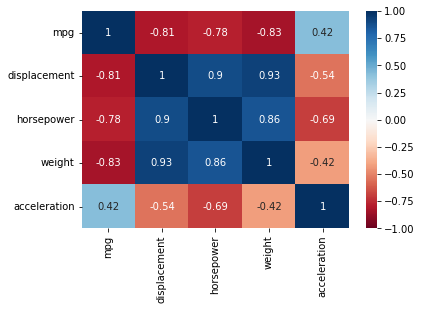

In [770]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')
# using diverging color scale with range being [-1,1] and center being 0

**Q: if we are going to predict mpg i Simple linear regression, which attribute are you most UNLOKELT to pick as the independent varaible? Explain why.**

A: acceleration, because it's correlation coefficenit's absoulte value is lowest

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

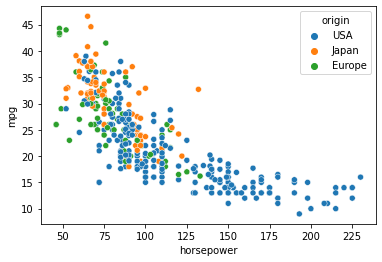

In [771]:
sns.scatterplot(data = flue_df,x="horsepower",y="mpg",hue="origin")
# seaborn.scatterplt
# hue: vector or key in data, grouping variable with diff color

**Q: If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

A: Polynomial Regression, because the relationship bewteen housepower and mpg seems a curve.


## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [772]:
X = flue_df.loc[:,["weight"]].values
Y = flue_df.loc[:,["mpg"]].values
type(X)

numpy.ndarray

In [773]:
print(X.shape)
print(Y.shape)

(392, 1)
(392, 1)


In [774]:
flue_df

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA
...,...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6,USA
388,44.0,97.0,52.0,2130.0,24.6,Europe
389,32.0,135.0,84.0,2295.0,11.6,USA
390,28.0,120.0,79.0,2625.0,18.6,USA


In [775]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)
# train_test_split
# random_set: shuffing befire split

In [776]:
print(type(X_train))
print(X_train.shape)
print(Y_train.shape)

<class 'numpy.ndarray'>
(313, 1)
(313, 1)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

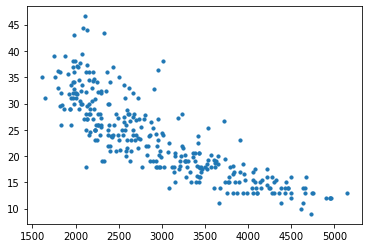

In [777]:
plt.scatter(X_train, Y_train, s=10)
plt.show()

In [778]:
model = LinearRegression()

In [779]:
model.fit(X_train,Y_train)

LinearRegression()

In [780]:
Yhat_train_predict=model.predict(X_train)
Yhat_test_predict=model.predict(X_test)

In [781]:
X_train.shape

(313, 1)

In [782]:
Yhat_train_predict.shape

(313, 1)

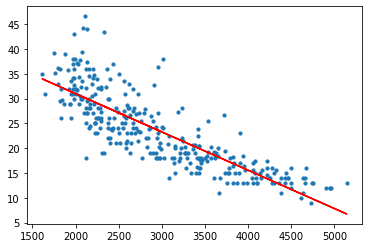

In [783]:
plt.scatter(X_train, Y_train, s=10)
plt.plot(X_train, Yhat_train_predict, color='r')
plt.show()

In [784]:
print('\nTraining error: %.2f' % mean_squared_error(Y_train, Yhat_train_predict))


Training error: 18.35


In [785]:
print('\nTesting error: %.2f' % mean_squared_error(Y_test, Yhat_test_predict))


Testing error: 19.98


#### test for 3 feature

In [786]:
flue_df.drop(["origin","mpg","acceleration"],axis=1)

,displacement,horsepower,weight
0,307.0,130.0,3504.0
1,350.0,165.0,3693.0
2,318.0,150.0,3436.0
3,304.0,150.0,3433.0
4,302.0,140.0,3449.0
...,...,...,...
387,140.0,86.0,2790.0
388,97.0,52.0,2130.0
389,135.0,84.0,2295.0
390,120.0,79.0,2625.0


In [787]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(flue_df.drop(["origin","mpg","acceleration"],axis=1).values,Y,test_size=0.2,random_state = 0)

In [788]:
reg2 = LinearRegression()
regmodel2 = reg2.fit(X_train2,Y_train2)

In [789]:
print(X_test2.shape)
print(X_train2.shape)

(79, 3)
(313, 3)


In [790]:
reg2_predictions=reg2.predict(X_test2)

In [791]:
print(X_test2.shape)
print(Y_test2.shape)

(79, 3)
(79, 1)


In [792]:
# The mean squared error
print('\nMean squared error: %.2f' % mean_squared_error(Y_test2, reg2_predictions))


Mean squared error: 18.70


### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [793]:
#### degree 2

In [794]:
X.shape

(392, 1)

In [795]:
polynomial_features= PolynomialFeatures(degree=2) # if two feature a,b-> [1, a, b, a^2, ab, b^2]
x_poly = polynomial_features.fit_transform(X) # x only has one feature,so generate [1,x,x**2]
print('Polynomial Features: [1,x,x**2]')
print(x_poly[0])

Polynomial Features: [1,x,x**2]
[1.0000000e+00 3.5040000e+03 1.2278016e+07]


In [796]:
x_poly.shape

(392, 3)

In [797]:
# x_poly_train = x_poly[:-79]
# y_train = Y[:-79]

# x_poly_test = x_poly[-79:]
# y_test = Y[-79:]
# # (372, 3)
# #(372, 1)
# #(20, 3)
# #(20, 1)
# print(type(x_poly_train))
# print(type(y_train))
# print(x_poly_train.shape)
# print(y_train.shape)
# print(x_poly_train[:10])
# print(y_train[:10])

In [798]:
x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly,Y,train_size=0.8,shuffle=False)
# print(type(x_poly_train))
# print(type(y_train))
# print(x_poly_train.shape)
# print(y_train.shape)
# print(x_poly_train[:10])
# print(y_train[:10])

In [799]:
print(x_poly_train.shape)
print(y_train.shape)
print(x_poly_test.shape)
print(y_test.shape)

(313, 3)
(313, 1)
(79, 3)
(79, 1)


In [800]:
model2 = LinearRegression()
model2.fit(x_poly_train, y_train)
yhat_train_pred = model2.predict(x_poly_train)
yhat_test_pred = model2.predict(x_poly_test)

print("Model weights: ")
print(model2.coef_)

Model weights: 
[[ 0.00000000e+00 -1.81479386e-02  1.78882056e-06]]


In [801]:
train_rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
print('Training RMSE: %8.15f' % train_rmse)
test_rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
print('Testing RMSE: %8.15f' % test_rmse)

Training RMSE: 3.065148605909208
Testing RMSE: 7.761747890276418


In [802]:
print(X.shape)
print(x_poly_train.shape)
print(yhat_train_pred.shape)

(392, 1)
(313, 3)
(313, 1)


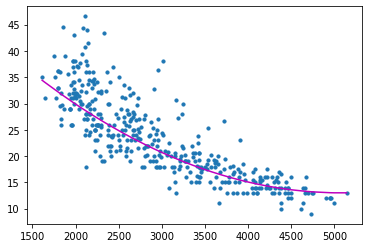

In [803]:
plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0) # sort_axis(array) -> return first item from array 
sorted_zip = sorted(zip(X,yhat_train_pred), key=sort_axis) # using first item in zip(X,yhat_train_pred))) to sort
x_poly_train, yhat_train_pred = zip(*sorted_zip) # unzip sorted_zip
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()

#### degree 3

In [804]:
polyomial_featurens3 = PolynomialFeatures(degree=3)
x_poly3 = polyomial_featurens3.fit_transform(X)
print(x_poly3[0])

[1.00000000e+00 3.50400000e+03 1.22780160e+07 4.30221681e+10]


In [805]:
# x_poly_train3 = x_poly3[:-20]
# x_poly_test3 = x_poly3[-20:]
x_poly_train3, x_poly_test3, y_train, y_test = train_test_split(x_poly3,Y,train_size=0.8,shuffle=False)

In [806]:
print(x_poly_train3.shape)
print(x_poly_test3.shape)


(313, 4)
(79, 4)


In [807]:
model3 = LinearRegression()
model3.fit(x_poly_train3, y_train)
yhat_train_pred3 = model3.predict(x_poly_train3)
yhat_test_pred3 = model3.predict(x_poly_test3)

print("Model weights: ")
print(model3.coef_)

Model weights: 
[[ 0.00000000e+00 -3.76510464e-02  7.97072215e-06 -6.23951946e-10]]


In [808]:
print(x_poly_test[0])
print(x_poly_test3[0])
print(yhat_train_pred[0])
print(yhat_train_pred3[0])

[1.000000e+00 3.003000e+03 9.018009e+06]
[1.0000000e+00 3.0030000e+03 9.0180090e+06 2.7081081e+10]
[34.4143903]
[17.59365442]


In [809]:
train_rmse3 = np.sqrt(mean_squared_error(y_train,yhat_train_pred3))
print('degree 3 Training RMSE: %8.15f' % train_rmse3)
test_rmse3 = np.sqrt(mean_squared_error(y_test,yhat_test_pred3))
print('degree 3 Testing RMSE: %8.15f' % test_rmse3)

print("\ndegree 2 RMSE:")
print('degree 2 Training RMSE: %8.15f' % train_rmse)
print('degree 2 Testing RMSE: %8.15f' % test_rmse)

degree 3 Training RMSE: 3.040277622791403
degree 3 Testing RMSE: 7.871731359289966

degree 2 RMSE:
degree 2 Training RMSE: 3.065148605909208
degree 2 Testing RMSE: 7.761747890276418


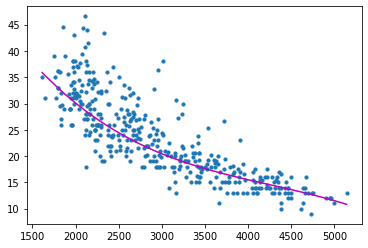

In [810]:
plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0) # sort_axis(array) -> return first item from array 
sorted_zip = sorted(zip(X,yhat_train_pred3), key=sort_axis) # using first item in zip(X,yhat_train_pred))) to sort
x_poly_train3, yhat_train_pred3 = zip(*sorted_zip) # unzip sorted_zip
plt.plot(x_poly_train3, yhat_train_pred3, color='m')
plt.show()

#### degree 4

In [811]:
polyomial_featurens4 = PolynomialFeatures(degree=4)
x_poly4 = polyomial_featurens4.fit_transform(X)
print(x_poly4[0])

[1.00000000e+00 3.50400000e+03 1.22780160e+07 4.30221681e+10
 1.50749677e+14]


In [812]:
# x_poly_train4 = x_poly4[:-20]
# x_poly_test4 = x_poly4[-20:]
x_poly_train4, x_poly_test4, y_train, y_test = train_test_split(x_poly4,Y,train_size=0.8,shuffle=False)

In [813]:
model4 = LinearRegression()
model4.fit(x_poly_train4, y_train)
yhat_train_pred4 = model4.predict(x_poly_train4)
yhat_test_pred4 = model4.predict(x_poly_test4)

print("Model weights: ")
print(model4.coef_)

Model weights: 
[[ 0.00000000e+00 -5.09792592e-02  1.44028663e-05 -1.95325308e-09
   9.95731275e-14]]


In [814]:
train_rmse4 = np.sqrt(mean_squared_error(y_train,yhat_train_pred4))
print('degree 4 Training RMSE: %8.15f' % train_rmse4)
test_rmse4 = np.sqrt(mean_squared_error(y_test,yhat_test_pred4))
print('degree 4 Testing RMSE: %8.15f' % test_rmse4)

print("\ndegree 3 RMSE:")
print('degree 3 Training RMSE: %8.15f' % train_rmse3)
print('degree 3 Testing RMSE: %8.15f' % test_rmse3)

print("\ndegree 2 RMSE:")
print('degree 2 Training RMSE: %8.15f' % train_rmse)
print('degree 2 Testing RMSE: %8.15f' % test_rmse)

degree 4 Training RMSE: 3.039717411020129
degree 4 Testing RMSE: 7.882106977405085

degree 3 RMSE:
degree 3 Training RMSE: 3.040277622791403
degree 3 Testing RMSE: 7.871731359289966

degree 2 RMSE:
degree 2 Training RMSE: 3.065148605909208
degree 2 Testing RMSE: 7.761747890276418


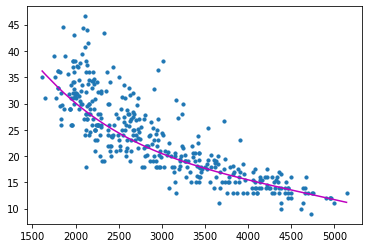

In [815]:
plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0) # sort_axis(array) -> return first item from array 
sorted_zip = sorted(zip(X,yhat_train_pred4), key=sort_axis) # using first item in zip(X,yhat_train_pred))) to sort
x_poly_train4, yhat_train_pred4 = zip(*sorted_zip) # unzip sorted_zip
plt.plot(x_poly_train4, yhat_train_pred4, color='m')
plt.show()

**Q: then based on reported errors from only these three degrees, do you think there is a sigh of overfitting? provide your reasoning**
A: Yes, because 3 and 4 degree's error on training data become lower than 2-degree and error on trainning data become higher than 2-degree.

## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


In [816]:
logistic_df = flue_df[flue_df["origin"]!="Europe"]

In [817]:
logistic_df

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA
...,...,...,...,...,...,...
386,27.0,151.0,90.0,2950.0,17.3,USA
387,27.0,140.0,86.0,2790.0,15.6,USA
389,32.0,135.0,84.0,2295.0,11.6,USA
390,28.0,120.0,79.0,2625.0,18.6,USA


In [818]:
print(type(logistic_df.drop("origin",axis=1)))
print(type(logistic_df.loc[:,"origin"]))
print(logistic_df.drop("origin",axis=1).shape)
print(logistic_df.loc[:,"origin"].shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(324, 5)
(324,)


In [819]:
# x_logistic_train = logistic_df.drop("origin",axis=1)[:-20]
# x_logistic_test = logistic_df.drop("origin",axis=1)[-20:]
# y_logistic_train = logistic_df.loc[:,"origin"][:-20]
# y_logistic_test = logistic_df.loc[:,"origin"][-20:]
x_logistic_train, x_logistic_test, y_logistic_train, y_logistic_test = train_test_split(logistic_df.drop("origin",axis=1),pd.factorize(logistic_df.loc[:,"origin"])[0],train_size=0.8,shuffle=False)

In [820]:
print(type(logistic_df.loc[:,"origin"]))
print(logistic_df.loc[:,"origin"][:15])
print(pd.factorize(logistic_df.loc[:,"origin"][:15]))
print((logistic_df.loc[:,"origin"].shape))
print(type(pd.factorize(logistic_df.loc[:,"origin"])[0]))

<class 'pandas.core.series.Series'>
0       USA
1       USA
2       USA
3       USA
4       USA
5       USA
6       USA
7       USA
8       USA
9       USA
10      USA
11      USA
12      USA
13      USA
14    Japan
Name: origin, dtype: object
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), Index(['USA', 'Japan'], dtype='object'))
(324,)
<class 'numpy.ndarray'>


In [821]:
print(x_logistic_train.shape)
print(x_logistic_test.shape)
print(y_logistic_train.shape)
print(y_logistic_test.shape)
print(type(x_logistic_train))
print(y_logistic_train[:5])

(259, 5)
(65, 5)
(259,)
(65,)
<class 'pandas.core.frame.DataFrame'>
[0 0 0 0 0]


In [822]:
print(pd.factorize(y_logistic_train[:20]))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]), array([0, 1]))


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**

Requirements
 - Report the testing precision and recall for both regions.

In [823]:
logistic_model = LogisticRegression(solver='liblinear', random_state=0)

In [824]:
clf = logistic_model.fit(x_logistic_train,y_logistic_train)

In [825]:
yhat_logistic_train_pred = logistic_model.predict(x_logistic_train)

In [826]:
yhat_logistic_test_pred = logistic_model.predict(x_logistic_test)

In [827]:
print("trainning accuracy: ",logistic_model.score(x_logistic_train,y_logistic_train))
print("test accuracy: ",logistic_model.score(x_logistic_test,y_logistic_test))

trainning accuracy:  0.918918918918919
test accuracy:  0.7076923076923077


In [828]:
#type(y_logistic_test.values)
print(y_logistic_test.shape)
print(yhat_logistic_test_pred.shape)

(65,)
(65,)


In [829]:
report = classification_report(y_logistic_test, yhat_logistic_test_pred)

In [830]:
print(report)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        33
           1       0.72      0.66      0.69        32

    accuracy                           0.71        65
   macro avg       0.71      0.71      0.71        65
weighted avg       0.71      0.71      0.71        65



**Q:if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**

A: the accuracy will get low, because the traning data between Japan and Europe is fewer than data between Japab and USA

#### Japan v.s. Europe

In [831]:
logistic_df2 = flue_df[flue_df["origin"]!="USA"]
x_logistic_train2, x_logistic_test2, y_logistic_train2, y_logistic_test2 = train_test_split(logistic_df2.drop("origin",axis=1),logistic_df2.loc[:,"origin"],train_size=0.8,shuffle=False)
logistic_model2 = LogisticRegression(solver='liblinear', random_state=0)
logistic_model2.fit(x_logistic_train2,y_logistic_train2)

LogisticRegression(random_state=0, solver='liblinear')

In [832]:
print(logistic_df.shape)
print(logistic_df2.shape)

(324, 6)
(147, 6)


In [833]:
yhat_logistic_test_pred2 = logistic_model2.predict(x_logistic_test2)

In [834]:
print("Japan and Europe's test accuracy: ",logistic_model2.score(x_logistic_test2,y_logistic_test2))

Japan and Europe's test accuracy:  0.6333333333333333


#### testing

In [835]:
logistic_model3 = LogisticRegression(solver='liblinear', random_state=0)
clf3 = logistic_model3.fit([[1],[2]],["USA","Japan"])

In [836]:
clf3.coef_

array([[-0.26775012]])

In [837]:
logistic_model4 = LogisticRegression(solver='liblinear', random_state=0)
clf4 = logistic_model4.fit([[1],[2]],["Japan","USA"])

In [838]:
clf4.coef_

array([[0.26775012]])

In [839]:
logistic_model5 = LogisticRegression(solver='liblinear', random_state=0)
clf5 = logistic_model5.fit([[1],[2]],["A","B"])
clf5.coef_

array([[0.26775012]])

In [840]:
logistic_model5 = LogisticRegression(solver='liblinear', random_state=0)
clf5 = logistic_model5.fit([[1],[2]],["B","C"])
clf5.coef_

array([[0.26775012]])

In [841]:
logistic_model5 = LogisticRegression(solver='liblinear', random_state=0)
clf5 = logistic_model5.fit([[1],[2]],["C","B"])
clf5.coef_

array([[-0.26775012]])

In [842]:
logistic_model5 = LogisticRegression(solver='liblinear', random_state=0)
clf5 = logistic_model5.fit([[1],[2]],[1,0])
clf5.coef_

array([[-0.26775012]])

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

In [843]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.0210914  -0.12440471  0.11056177  0.00203356 -0.01354358]]
[-0.00020683]


**top 3 coefficients**
- 0.0210914
  - contribution
    - show the relationship between mpg and origin
  - meaning
    - e^0.0210914 = 1.0213153956
    - it means that when mpg increasing 1, the probability of the orgin is Japan would increase 0.0213153956
- -0.12440471
  - contribution
    - show the relationship between displacement and origin
  - meaning
    - e^-0.12440471 = 0.8830224006
    - it means that when mpg increasing 1, the probability of the orgin is Japan would decrease 0.1169775994
- 0.11056177
  - contribution
    - show the relationship between horsepower and origin
  - meaning
    - e^0.11056177 = 1.1169053382
    - it means that when mpg increasing 1, the probability of the orgin is Japan would increase 0.1169053382
- contribution to yhat
  - those coefficients are linear function's coeffients, and this linear function can help logistic regression to separate the origin as Japan and the United States.


In [844]:
plt.scatter(clf.coef_,)

TypeError: ignored

### Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

reference:
- Delete Rows & Columns in DataFrames Quickly using Pandas Drop:
https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
- How to reshape Pandas Series into 2d array:
https://datascientyst.com/reshape-pandas-series-into-2d-array/
- sklearn.preprocessing.PolynomialFeatures:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
- 